In [ ]:
# !pip install paho-mqtt isntalled dont need to do again
# Based off this: https://github.com/eclipse/paho.mqtt.python/blob/master/examples/subscribe_simple.py
import paho.mqtt.subscribe as subscribe

topics = ['alextemp', 'alexhumidity']

data = []
m = subscribe.simple(topics, hostname="pf-eveoxy0ua6xhtbdyohag.cedalo.cloud", retained=False, msg_count=len(topics))

for a in m:
        print(a.payload)
        data.append(a.payload)

temperature = []
humidity = []

temperature.append(float(data[0].decode('utf-8')))

humidity.append(float(data[1].decode('utf-8')))
humidity


b'22.93'
b'0.00'


[0.0]

In [16]:
import paho.mqtt.subscribe as subscribe
import pandas as pd
topics = ['alextemp', 'alexhumidity']

temperature = []
humidity = []

n_prints = 5
for n in range(0,n_prints):
    data = []
   
    m = subscribe.simple(topics, hostname="pf-eveoxy0ua6xhtbdyohag.cedalo.cloud", retained=False, msg_count=len(topics))
    for a in m:
        # print(a.payload)
        data.append(a.payload)
    temperature.append(float(data[0].decode('utf-8')))
    humidity.append(float(data[1].decode('utf-8')))
print(temperature)
print(humidity)
    
df = pd.DataFrame({ 
    'temperature': temperature,
    'humidity': humidity   
})
print(df)

df.to_csv('output.csv', index=False)


[22.55, 22.57, 22.56, 22.56, 22.55]
[0.0, 0.0, 0.0, 0.0, 0.0]
   temperature  humidity
0        22.55       0.0
1        22.57       0.0
2        22.56       0.0
3        22.56       0.0
4        22.55       0.0


In [ ]:
import paho.mqtt.subscribe as subscribe
import pandas as pd
topics = ['alextemp', 'alexhumidity','alextime']

temperature = []
humidity = []
time=[]

n_prints = 5
for n in range(0,n_prints):
    data = []
   
    m = subscribe.simple(topics, hostname="pf-eveoxy0ua6xhtbdyohag.cedalo.cloud", retained=False, msg_count=len(topics))
    for a in m:
        # print(a.payload)
        data.append(a.payload)
    temperature.append(float(data[0].decode('utf-8')))
    humidity.append(float(data[1].decode('utf-8')))
    time.append(float(data[2].decode('utf-8')))
print(temperature)
print(humidity)
print(time)
    
df = pd.DataFrame({ 
    'temperature()': temperature,
    'humidity': humidity, 
    'time(s)' : time  
})
print(df)

df.to_csv('output.csv', index=False)


[24.93, 24.93, 24.92, 24.93, 24.93]
[39.0, 39.0, 39.0, 39.0, 39.0]
[31.0, 36.0, 41.0, 46.0, 51.0]
   temperature  humidity  time
0        24.93      39.0  31.0
1        24.93      39.0  36.0
2        24.92      39.0  41.0
3        24.93      39.0  46.0
4        24.93      39.0  51.0


In [ ]:
import paho.mqtt.subscribe as subscribe
import pandas as pd
topics = ['alextemp', 'alexhumidity','alextime','alexgas']

temperature = []
humidity = []
time=[]
gas=[]

n_prints = 5
for n in range(0,n_prints):
    data = []
   
    m = subscribe.simple(topics, hostname="pf-eveoxy0ua6xhtbdyohag.cedalo.cloud", retained=False, msg_count=len(topics))
    for a in m:
        # print(a.payload)
        data.append(a.payload)
    temperature.append(float(data[0].decode('utf-8')))
    humidity.append(float(data[1].decode('utf-8')))
    time.append(float(data[2].decode('utf-8')))
    gas.append(float(data[3].decode('utf-8')))
print(temperature)
print(humidity)
print(time)
print(gas)
    
df = pd.DataFrame({ 
    'temperature()': temperature,
    'humidity': humidity, 
    'time(s)' : time,
    'gas': gas 
})
print(df)

df.to_csv('output.csv', index=False)

In [ ]:
import sqlite3
import pandas as pd
file_path = 'output.csv'
df = pd.read_csv(file_path) # remember read csv not read excel

df.head() 

   temperature  humidity  time
0        24.93      39.0  31.0
1        24.93      39.0  36.0
2        24.92      39.0  41.0
3        24.93      39.0  46.0
4        24.93      39.0  51.0


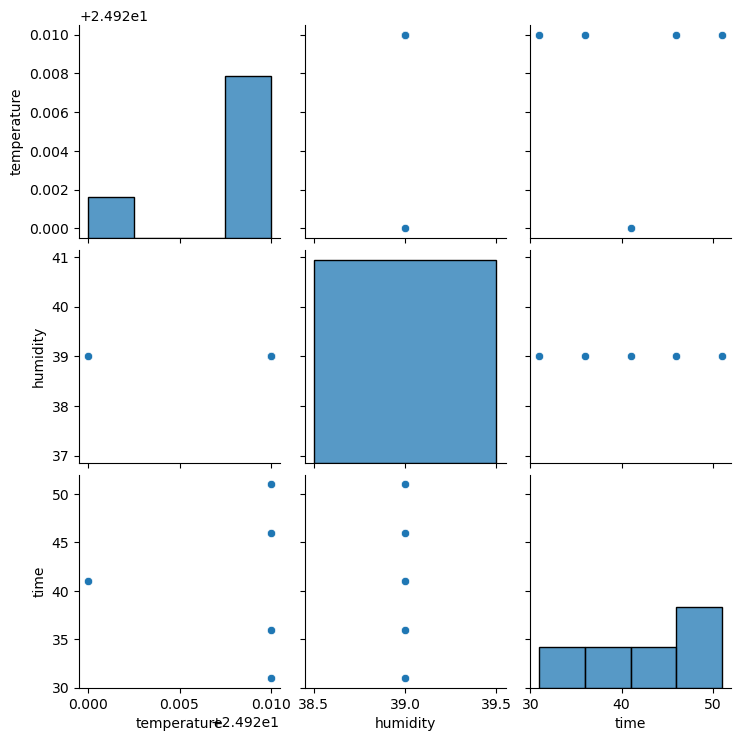

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
file_path = 'output.csv'
df = pd.read_csv(file_path)

# View the first few rows of the DataFrame
print(df.head())

# Assuming you want to visualize relationships between columns
# Example: Pairplot to visualize relationships in numerical columns
sns.pairplot(df)
plt.show()


In [5]:

conn = sqlite3.connect('output.db')

cursor = conn.cursor()

create_table_sql = 'CREATE TABLE IF NOT EXISTS cpd_data (compound_name TEXT, reason TEXT, parent_name TEXT);'

cursor.execute(create_table_sql)
conn.commit()

print(create_table_sql)

CREATE TABLE IF NOT EXISTS cpd_data (compound_name TEXT, reason TEXT, parent_name TEXT);


   temperature  humidity  time
0        24.93      39.0  31.0
1        24.93      39.0  36.0
2        24.92      39.0  41.0
3        24.93      39.0  46.0
4        24.93      39.0  51.0


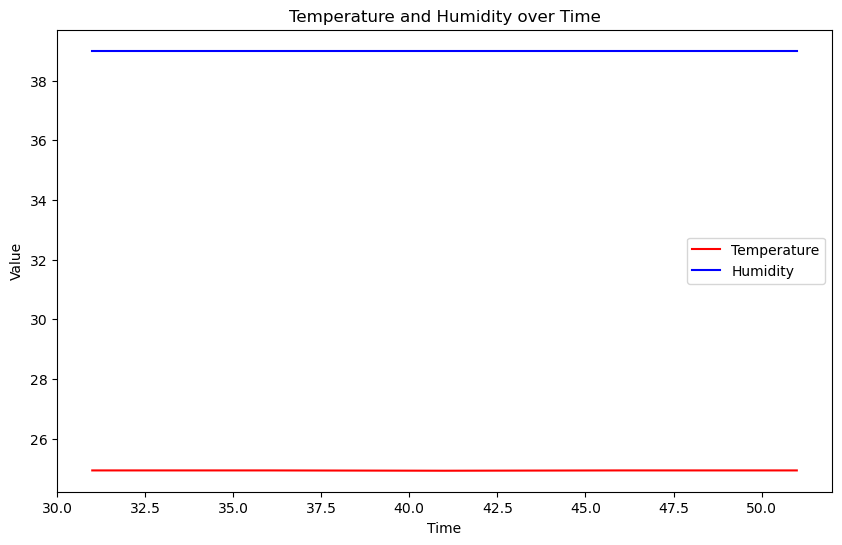

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = 'output.csv'
df = pd.read_csv(file_path)

# View the first few rows of the DataFrame
print(df.head())
# Line plot showing temperature and humidity over time
plt.figure(figsize=(10, 6))

sns.lineplot(x='time', y='temperature', data=df, label='Temperature', color='red')
sns.lineplot(x='time', y='humidity', data=df, label='Humidity', color='blue')

plt.title('Temperature and Humidity over Time')
plt.xlabel('Time(s)')
plt.ylabel('Value')
plt.legend()

plt.show()